# Análise Exploratória de Dados

In [211]:
import numpy as np
import pandas as pd
#graficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import squarify
import seaborn as sns
#estat
from scipy import stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv("C:/Users/SAMSUNG/OneDrive/Documentos/GitHub/vendas_carros/dados/df_clean.csv")

In [3]:
df.shape

(356266, 15)

In [4]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
1,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al
2,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al
3,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al
4,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al


# Análise Gráfica

In [7]:
df['region'].value_counts().sort_values(ascending=False).head(10)

columbus                 3157
jacksonville             2874
grand rapids             2806
kansas city, MO          2725
nashville                2663
milwaukee                2659
sarasota-bradenton       2658
tampa bay area           2651
south jersey             2623
ft myers / SW florida    2599
Name: region, dtype: int64

In [38]:
mpl.rcParams.update(mpl.rcParamsDefault)


In [223]:
#Gráficos
plt.style.use('ggplot')
def plot_barh(data, title):
    plt.figure(figsize=(10,6))
    plt.barh(data.index, data.values, color=['#5e548e'])
    plt.title(title, size=14, weight='bold')
    plt.xticks([])
    plt.gca().invert_yaxis()

    rects = plt.gca().patches
    for rect in rects:
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2
        space = -45
        ha = 'left'
        if x_value < 0:
            space *= -1
            ha = 'right'
        label = "{:.0f}".format(x_value)
        plt.annotate(
            label,
            (x_value, y_value),
            xytext=(space, 0),
            textcoords="offset points",
            va='center',
            ha=ha,
            color='white',
            weight='bold',
            size=12)

    plt.show()

def plot_treemap(data, title):
    
    sizes = data.values
    labels = data.index
    sizes_perc = sizes / sum(sizes)

    colors = ['#231942', '#3a7ca5', '#00a896', '#be95c4', '#81c3d7', '#0a2472']

    plt.figure(figsize=(8, 6))
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)

    ax = plt.gca()

    for i, (label, size, perc) in enumerate(zip(labels, sizes, sizes_perc)):
        x, y, dx, dy = ax.patches[i].get_x(), ax.patches[i].get_y(), ax.patches[i].get_width(), ax.patches[i].get_height()
        plt.text(x + dx / 2, y + dy / 2 - 5, f'{size}', fontsize=10, ha='center', va='center', color='white', weight='bold')
        plt.text(x + dx / 2, y + dy / 2 - 8, f'({perc:.2%})', fontsize=8, ha='center', va='center', color='white')

    plt.axis('off')
    plt.title(title)
    plt.show()

def scatterplot(price, odometer, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.scatter(price, odometer, c='#5e548e', alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_histogram_kde(data, title, xlabel, ylabel, color):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    


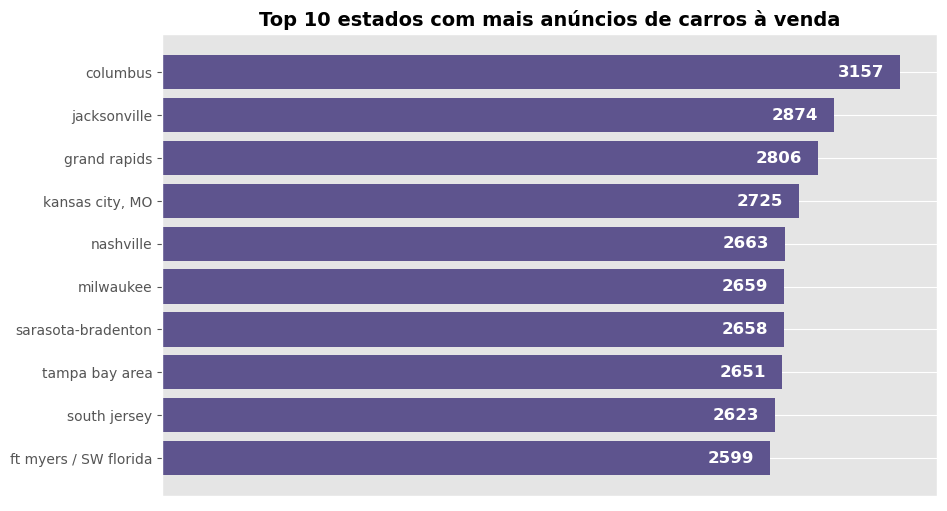

In [56]:
region_p = df['region'].value_counts()[0:10]
plot_barh(region_p, 'Top 10 estados com mais anúncios de carros à venda')

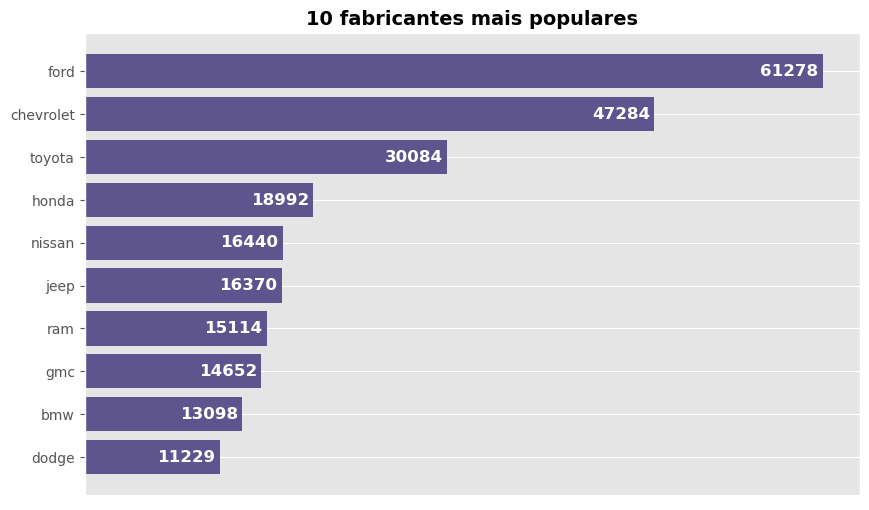

In [57]:
manufactures_p = df['manufacturer'].value_counts()[0:10]
plot_barh(manufactures_p, '10 fabricantes mais populares')

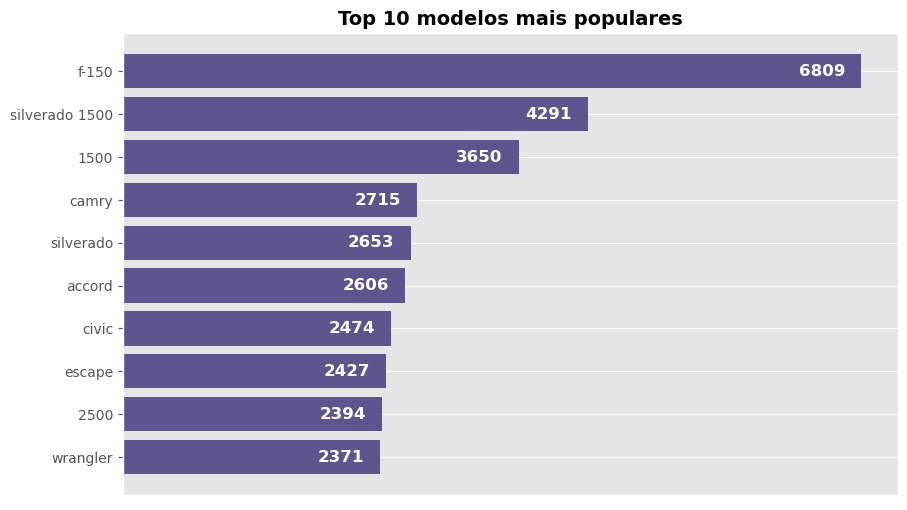

In [58]:
model_p = df['model'].value_counts()[0:10]
plot_barh(model_p, 'Top 10 modelos mais populares')

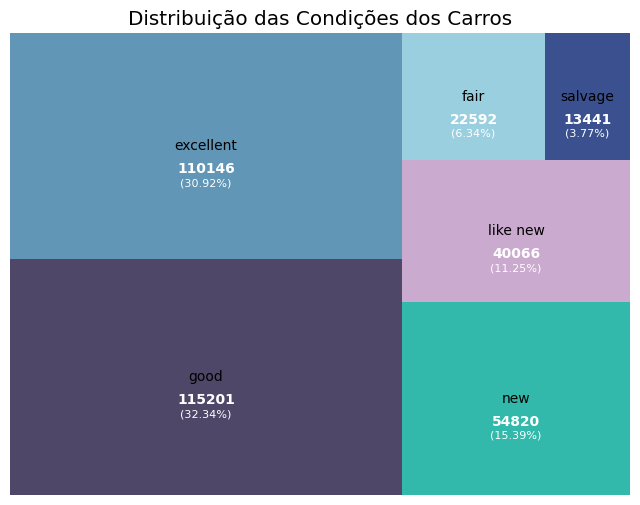

In [177]:
condition_counts = df['condition'].value_counts()
plot_treemap(condition_counts, 'Distribuição das Condições dos Carros')


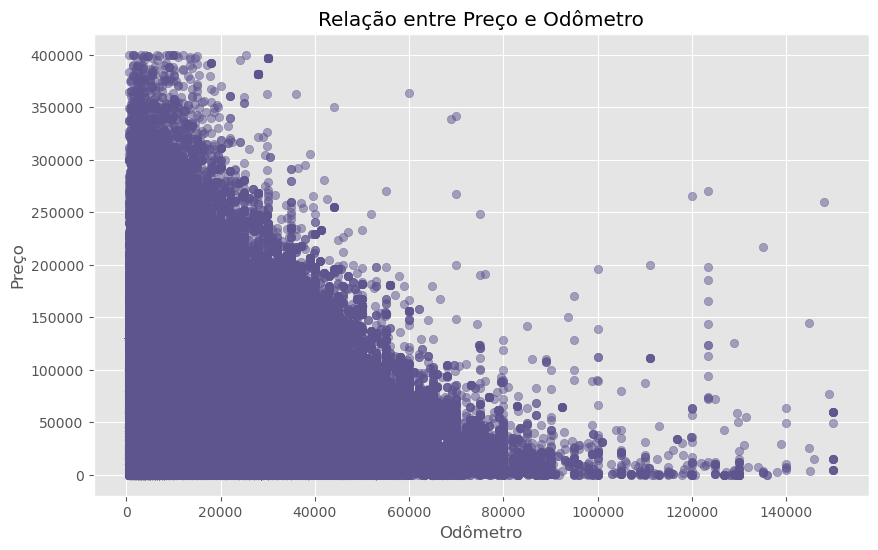

In [160]:
scatterplot(df['price'], df['odometer'], 'Relação entre Preço e Odômetro', 'Odômetro', 'Preço')

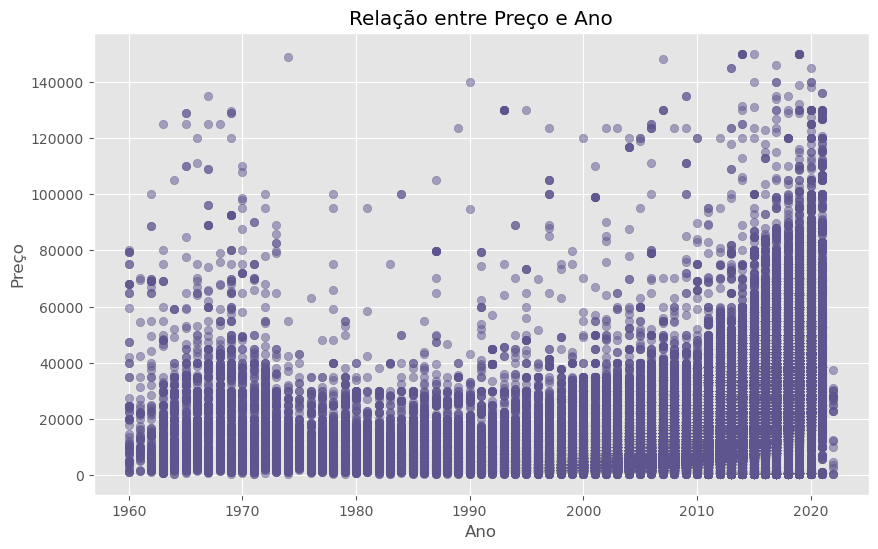

In [172]:
scatterplot( df['year'],df['price'], 'Relação entre Preço e Ano', 'Ano', 'Preço')

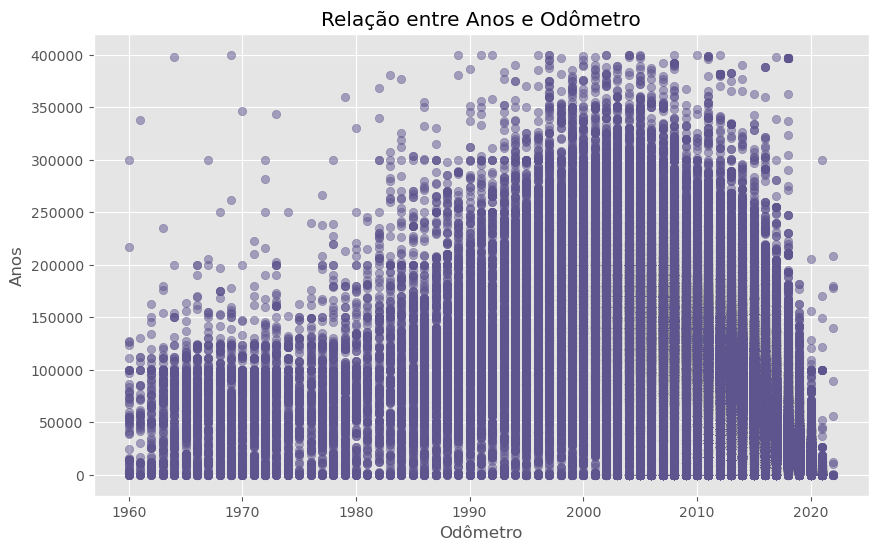

In [173]:
scatterplot(df['year'], df['odometer'], 'Relação entre Anos e Odômetro', 'Odômetro', 'Anos')

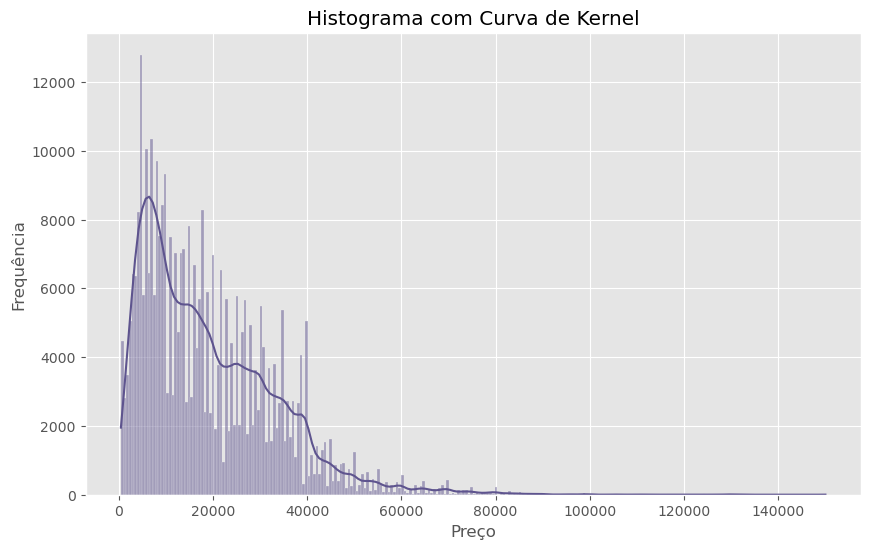

In [165]:
plot_histogram_kde(df['price'], 'Histograma com Curva de Kernel: Preço', 'Preço', 'Frequência', '#5e548e')


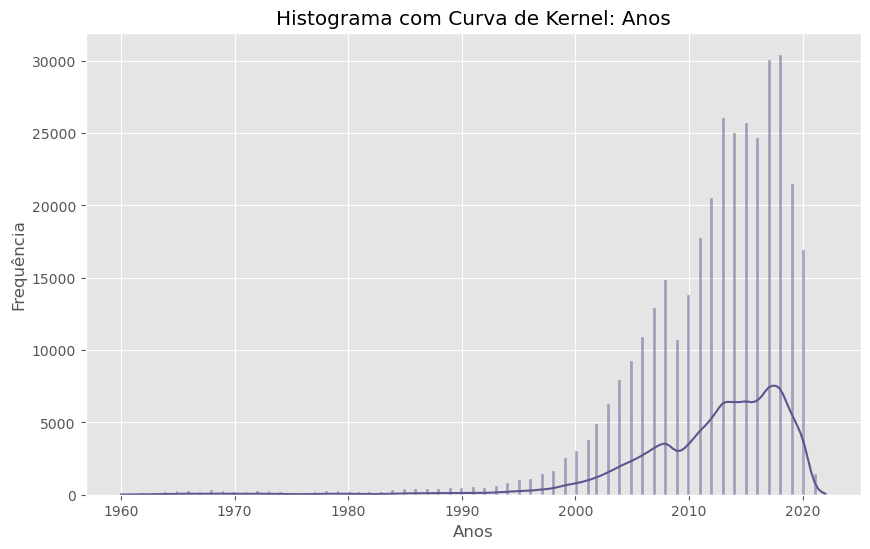

In [189]:
plot_histogram_kde(df['year'], 'Histograma com Curva de Kernel: Anos', 'Anos', 'Frequência', '#5e548e')


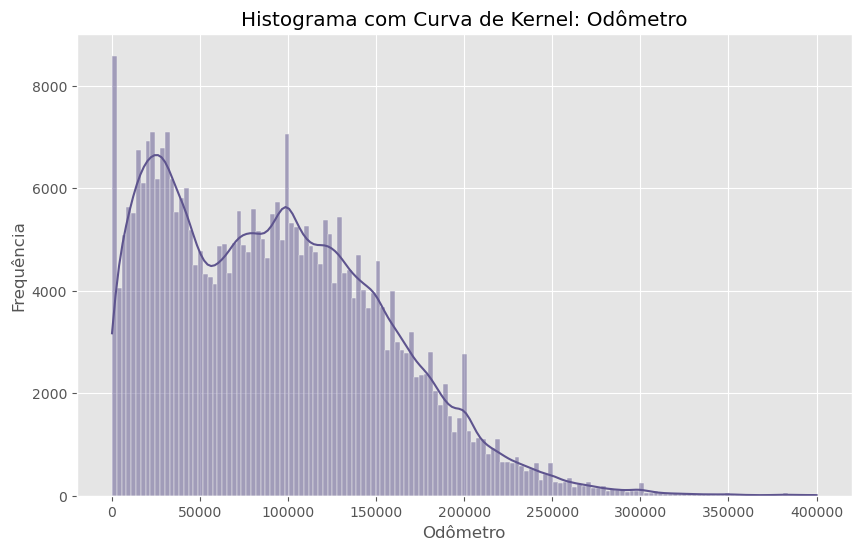

In [190]:
plot_histogram_kde(df['odometer'], 'Histograma com Curva de Kernel: Odômetro', 'Odômetro', 'Frequência', '#5e548e')


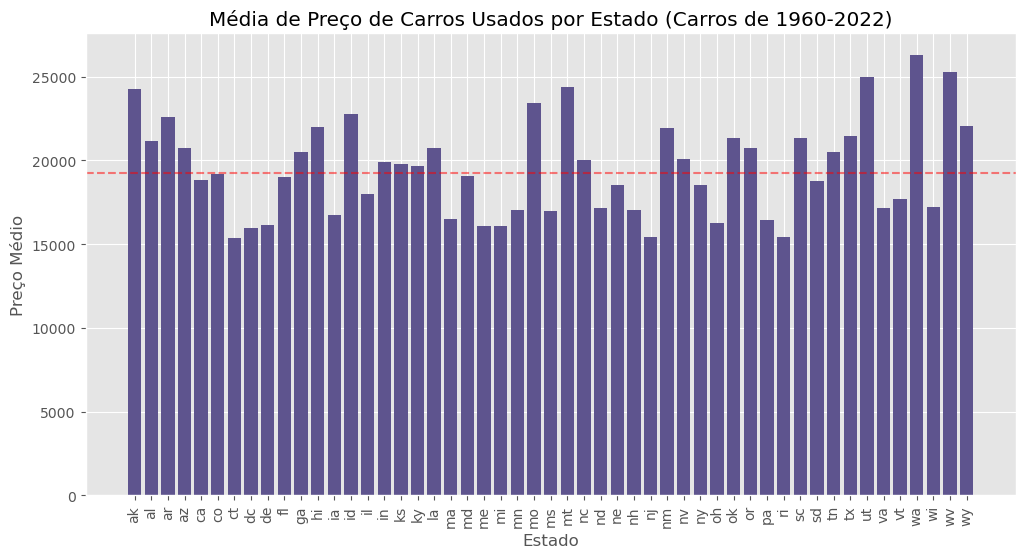

In [188]:
# Filtrar os registros entre 1960 e 2022
filtered_df = df[(df['year'] >= 1960) & (df['year'] <= 2022)]

# Calcular a média do preço dos carros usados para cada estado
average_price_by_state = filtered_df.groupby('state')['price'].mean()

#Média do dataset
mean_price = df['price'].mean()

# Criar um gráfico de barras com a média de preço para cada estado
plt.figure(figsize=(12, 6))
plt.bar(average_price_by_state.index, average_price_by_state.values, color='#5e548e')
plt.title('Média de Preço de Carros Usados por Estado (Carros de 1960-2022)')
plt.axhline(mean_price, color='red', linestyle='--', label='Média', alpha =  0.5)
plt.xlabel('Estado')
plt.ylabel('Preço Médio')
plt.xticks(rotation=90)
plt.show()

# Medidas de tendência central e dispersão

In [5]:
df.describe()

,price,year,odometer
count,356266.00000,356266.000000,356266.000000
mean,19233.94375,2011.684797,92983.460414
std,14435.68608,7.638730,62826.655764
min,500.00000,1960.000000,1.000000
25%,7900.00000,2008.000000,38995.000000
50%,15990.00000,2013.000000,88000.000000
75%,27990.00000,2017.000000,135645.250000
max,149998.00000,2022.000000,400000.000000


In [6]:
df.describe(include='object').T

,count,unique,top,freq
region,356266,404,columbus,3157
manufacturer,356266,41,ford,61278
model,356266,20812,f-150,6809
condition,356266,6,good,115201
cylinders,356266,8,6 cylinders,225885
fuel,356266,5,gas,302581
title_status,356266,6,clean,338628
transmission,356266,3,automatic,278985
drive,356266,3,4wd,155546
type,356266,13,other,92344


# Linearizando as variáveis para inferência

O principal objetivo da transformação das varipaveis é tornar linear uma relação não linear, muito embora existam outras motivações, tais como obter uma distribuição normal dos dados, aliviar problemas de heterocesticidade e obter estimativas menos sensíveis a valores extremos. O pressuposto da linearidade  é o alicerce do modelo de regressão clássica.
O uso de logarítimos é um dos principais instrumentos matemáticos utilizados na modelagem estatística. Essas transformações podem ser utilizaadas para obter uma distribuição de dados mais próxima da distribuição de dados mais próxima da distribuição normal. A utilização do logaritmo natural é preferida nesse caso, em razão de uma propriedade interessante do logaritmo natural: pequenas variações no logaritmo natural representam variações percentuais na variável em análise.
Normalmente, utiliza-se o logaritmo para variáveis expressas em valores monetários positivos e grandes valores inteiros que sejam positivos e diferentes de zero. É justamente isso que faremos aqui.

In [192]:
# Criar a nova coluna com o ln do preço
df['ln_price'] = np.log(df['price'])

# Criar a nova coluna com o ln do odometro
df['ln_odometer'] = np.log(df['odometer'])

In [193]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,ln_price,ln_odometer
0,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,9.615805,11.759786
1,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al,10.239603,11.137446
2,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al,10.451320,10.292112
3,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al,10.463103,10.668955
4,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al,10.308619,9.758577


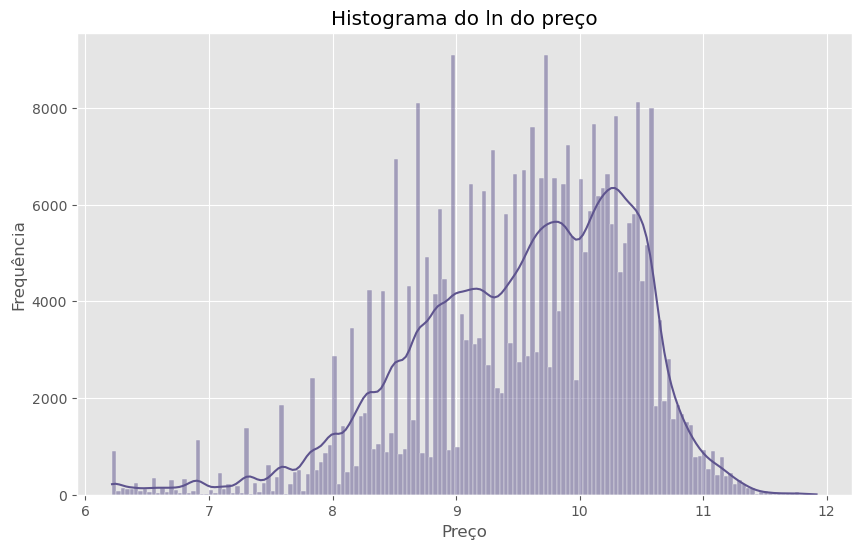

In [195]:
plot_histogram_kde(df['ln_price'], 'Histograma do ln do preço', 'Preço', 'Frequência', '#5e548e')

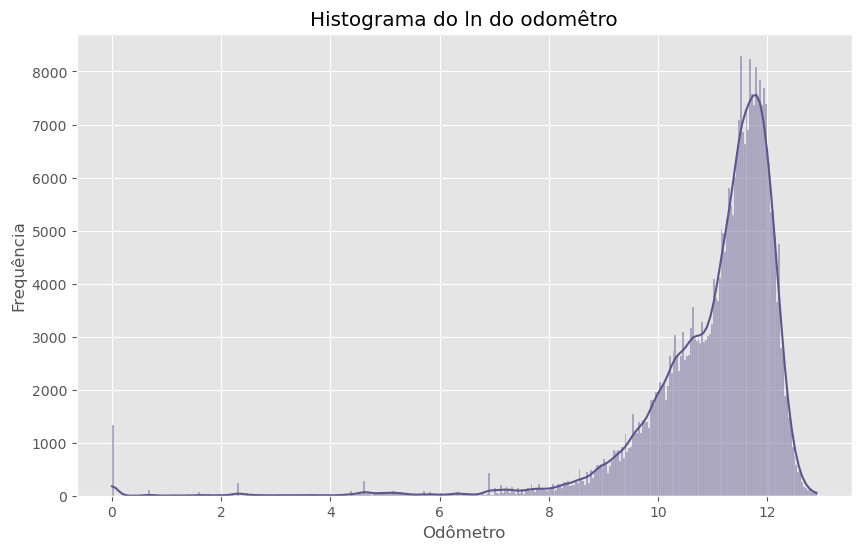

In [210]:
plot_histogram_kde(df['ln_odometer'], 'Histograma do ln do odomêtro', 'Odômetro', 'Frequência', '#5e548e')

- As variáveis em ln estão bem mais próximas da normalidade dos dados.

# Testes de normalidade

A relevância dos testes de normalidade reside no fato que algumas estratégia estatisticas são baseados no pressuposto de normalidade. Como no caso da regressão linear por mínimos quadrados ordinários.
Iremos utilizar dois testes:
- Estatística de Jarque-Bera: teste de normalidade dos dados que incorpora simultaneamente os conceitos de assimetria e curtose. Aprsenta a distribuição Qui-Quadrado e, sempre que o valor de sua probabilidade for inferior a 0,05 rejeita-se a hipótse de normalidade com 95% de confiança.
- Q-Q Plot: É possível utilizar o Q-Q Plot para confirmar se as variáveis apresentam distribuição normal. O Q-Q plot é um gráfico que permite realizar a comparação visual dos quartis da amostra com os quartis teóricos para uma distribuição normal. Se as observações se distanciam da linha reta, a variável não apresenta distribuição normal.



## Teste de Normalidade Jarque-Bera

H0: Dados populacionais normalmente distribuidos.

Ha: Dados populacionais seguem outra distribuição de probabilidade

nível de significância escolhido: 5%

In [201]:
jb_ln_price= stats.jarque_bera(df['ln_price'])

In [202]:
jb_ln_price.pvalue

0.0

In [208]:
jb_ln_odometer = stats.jarque_bera(df['ln_odometer'])

In [209]:
jb_ln_odometer.pvalue

0.0

Vamos avaliar o p-valor. Tanto o p-valor do `ln_price` quanto do `ln_odometer` são 0.0. Como esse valor  é menor do que o nível de significância escolhido de 5%, podemos rejeitar a hipótese nula de que as variáveis são normalmente distribuidos. 
Portanto, nesse contexto, um valor-p de 0.0 indica que os dados da coluna `ln_price` e `ln_odometer` não seguem uma distribuição normal. 

## Q-QPlot

Para ver o quão longe as distribuições estão da normalidade, iremos utilizar o Q-QPlot.

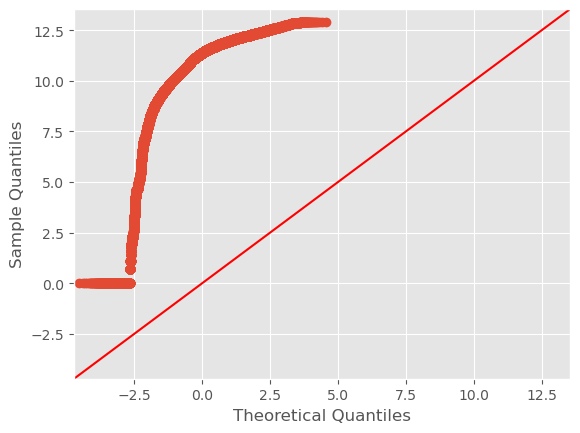

In [229]:
sm.qqplot(df['ln_odometer'], line ='45')

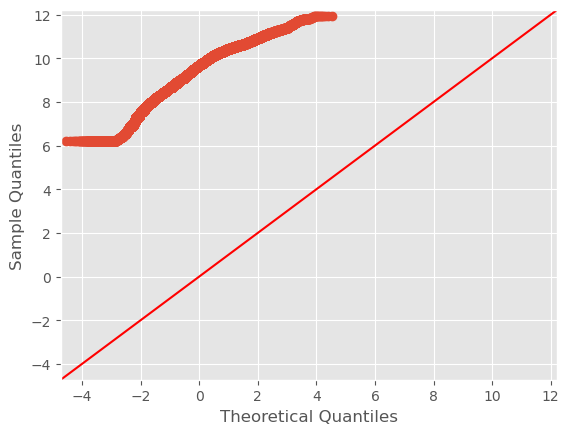

In [230]:
sm.qqplot(df['ln_price'], line ='45')

Claramente, elas não são distribuições normais. Como temos muitos dados e alguns outliers que fazem a distribuição ser assimétricas, vou assumir que elas tendem a normalidade dos dados e prosseguir com a regressão.
Após vou testar a normalidade dos resíduos, que é pressuposto para o modelo linear clássico. Caso o teste falhe teremos que lidar com este problema de maneiras mais sofisticadas.